In [42]:
#hello!!

# this is my initial implementation of Word2Vec 
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("train_data.csv")

df

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0
...,...,...
16985,KfW credit line for Uniper could be raised to ...,3
16986,KfW credit line for Uniper could be raised to ...,3
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3
16988,Global ESG bond issuance posts H1 dip as supra...,3


In [43]:
df = shuffle(df)
df

,text,label
11180,AIER Leading Indicators Index Falls To The Low...,14
1155,QIAGEN’s Clinical Decision Support Platform QC...,2
16947,Bond investors are demanding a premium to hold...,3
4614,Elanco Confirms Date and Conference Call for S...,5
14774,$TLRY $TLRY:CA $HEXO:CA - With Tilray's $155M ...,18
...,...,...
2379,What's next for Elon Musk and Twitter? https:...,2
15329,$ZI - ZoomInfo: Strong Growth But Shares Are T...,18
3628,Africa’s largest listed food maker will extend...,2
13896,$XLK: Sector Briefing: Technology https://t.c...,18


In [44]:
text_column = "text"
label_column = "label"

In [45]:
#WORD 2 VEC
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
df["tokens"] = df[text_column].apply(lambda tweet: tokenizer.tokenize(tweet.lower()))
sentences = df["tokens"].tolist()
sentences #this tokenizes them and does a litttle bit of preprocessing, used the one specifically for tweets!

# Word2Vec needs lists of words like this!!

[['aier',
  'leading',
  'indicators',
  'index',
  'falls',
  'to',
  'the',
  'lowest',
  'level',
  'since',
  'august',
  '2020',
  '.',
  'https://t.co/7u5fkamnmc',
  '#business',
  '#markets',
  '#stocks'],
 ['qiagen',
  '’',
  's',
  'clinical',
  'decision',
  'support',
  'platform',
  'qci',
  'surpasses',
  'three',
  'million',
  'ngs',
  'patient',
  'test',
  'cases',
  'https://t.co/h7rcadccyk',
  'https://t.co/hi025pax4m'],
 ['bond',
  'investors',
  'are',
  'demanding',
  'a',
  'premium',
  'to',
  'hold',
  'australia',
  '’',
  's',
  'sovereign',
  'debt',
  'after',
  'being',
  'burned',
  'by',
  'the',
  'central',
  'bank',
  '’',
  's',
  'failure',
  'to',
  'provide',
  'reliable',
  'guidance',
  'on',
  'inflation',
  'and',
  'interest',
  'rates',
  'https://t.co/udxcmwue3p'],
 ['elanco',
  'confirms',
  'date',
  'and',
  'conference',
  'call',
  'for',
  'second',
  'quarter',
  '2022',
  'financial',
  'results',
  'announcement',
  'https://t.co/y

In [46]:
# vector_size is the size of the "description" of numbers that each word has
# window is how many words around each word it looks at
# min_count is the minimum count words have to appear for them to be included
# workers is CPU threads (like in CNN)

from gensim.models import Word2Vec
Word_2_Vec_model = Word2Vec(sentences, vector_size = 100, window = 5, min_count = 2, workers = 4)
Word_2_Vec_model.wv['market']

array([-0.7069568 ,  0.34794766,  0.13194811,  0.04146361,  0.6275458 ,
       -0.3843984 ,  0.6092524 ,  1.7313088 , -0.31092784, -1.0599812 ,
        0.03084515, -0.8504924 ,  0.07594121, -0.4554332 , -0.01554419,
       -0.16481979,  0.19649427, -0.20556663,  0.03887689, -0.60753363,
       -0.6276865 ,  0.82591134,  0.35793206, -0.43130457, -0.08407917,
        0.59238064, -0.36686727, -0.42588618, -0.63967186,  0.4424185 ,
        1.0931729 , -0.07584672,  0.14055467, -1.0921617 , -0.3647607 ,
        0.5563329 ,  0.09063711, -0.4189752 , -0.2809666 , -0.7269161 ,
        0.14183941, -0.6252524 , -0.4871599 ,  0.14925076,  1.037742  ,
       -0.07652079,  0.01447944, -0.4872086 ,  0.5693238 , -0.09954708,
        0.4723749 , -0.24597794,  0.1053009 , -0.5407539 , -0.48269415,
        0.25247478, -0.06106547,  0.26859868, -0.34670606,  0.3225178 ,
       -0.01129442,  0.09351801,  0.1812445 , -0.31977406, -0.57141846,
        0.46585935, -0.13419676,  0.51307184, -0.5988984 ,  0.50

In [47]:
my_word = "market"
count = Word_2_Vec_model.wv.get_vecattr(my_word, "count")
count

# this means that market appeared 548 times in my dataset!

np.int64(548)

In [48]:
# now that i have each word as a vector, i want to apply that to each of my words, and then take the average and save that as my "vector" for the entire tweet
X = []
for token_array in df["tokens"]:
    # for each tweet: 
    words_tokenized = [] # make a list
    for token in token_array: # for each word in the tweet
        if token in Word_2_Vec_model.wv: # if it's not rare enough and we managed to save it as an array
            words_tokenized.append(Word_2_Vec_model.wv[token]) # add it's token to the list
    if len(words_tokenized) == 0: # if my tweet is so rare that we managed actually no words to get in my model (seems impossible but just in case)
        X.append(np.zeros(100)) # this is just gonna be 0 for everything
    else:
        X.append(np.mean(words_tokenized, axis = 0)) # if it's not rare, and we were able to get at least one word saved into the model and into words_tokenized, take the average of all of the words and save that as the tweet's token
X

[array([-0.3353384 ,  0.5178231 ,  0.19648176, -0.41896138,  0.57407486,
        -0.7743477 ,  0.2252642 ,  1.1110208 , -0.6515257 , -0.90021133,
        -0.20079917, -0.8723819 , -0.01310419, -0.1511557 ,  0.37453422,
        -0.19999479, -0.06681047, -0.31523642,  0.08917855, -0.87947506,
        -0.15561438,  0.20859627,  0.7665921 , -0.64436275, -0.24971308,
         0.29645652, -0.5328538 , -0.42064378, -0.08869108,  0.23545115,
         0.69509614,  0.07811095,  0.11759804, -0.9354683 ,  0.03157439,
         0.08493511, -0.03847126, -0.03593751, -0.3382306 , -0.6039593 ,
         0.35373023, -0.6627234 ,  0.01450584,  0.42240816,  0.7610222 ,
        -0.21741837, -0.31706607, -0.4059758 ,  0.12208506,  0.23164418,
         0.2605785 , -0.31613797,  0.13522454, -0.46128714, -0.3981773 ,
         0.05500458,  0.01743245,  0.42569438, -0.513523  ,  0.04777009,
         0.28386322,  0.27709138,  0.12001064,  0.15947136, -0.3908182 ,
         0.5224648 ,  0.34513658,  0.81180024, -0.7

In [49]:
X = np.vstack(X) # this converts my 1-dimensional array into a 2-dimensional array which i want for processing
y = df[label_column].values
X

# these are my X and y that i can now use on different things !!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=5000, random_state=2501, stratify=y)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(verbose = True, hidden_layer_sizes=(128, 64), batch_size = 16, \
                          max_iter=1000, solver='adam', activation='relu',\
                          learning_rate = 'constant', learning_rate_init = 0.001, random_state=2501)

In [51]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.88989100
Iteration 2, loss = 1.64229498
Iteration 3, loss = 1.56238986
Iteration 4, loss = 1.51432737
Iteration 5, loss = 1.47970786
Iteration 6, loss = 1.45329276
Iteration 7, loss = 1.42838099
Iteration 8, loss = 1.40396903
Iteration 9, loss = 1.38149655
Iteration 10, loss = 1.36851272
Iteration 11, loss = 1.35232095
Iteration 12, loss = 1.34149427
Iteration 13, loss = 1.32949737
Iteration 14, loss = 1.31187808
Iteration 15, loss = 1.30165923
Iteration 16, loss = 1.29331087
Iteration 17, loss = 1.27764801
Iteration 18, loss = 1.27092938
Iteration 19, loss = 1.26099295
Iteration 20, loss = 1.25073536
Iteration 21, loss = 1.24413021
Iteration 22, loss = 1.23142241
Iteration 23, loss = 1.23035107
Iteration 24, loss = 1.21851398
Iteration 25, loss = 1.21670062
Iteration 26, loss = 1.20870274
Iteration 27, loss = 1.20050777
Iteration 28, loss = 1.19329919
Iteration 29, loss = 1.18547391
Iteration 30, loss = 1.18134842
Iteration 31, loss = 1.17208879
Iteration 32, los

,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,16
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,2501


In [52]:
mlp.score(X_train, y_train)

0.8527105921601335

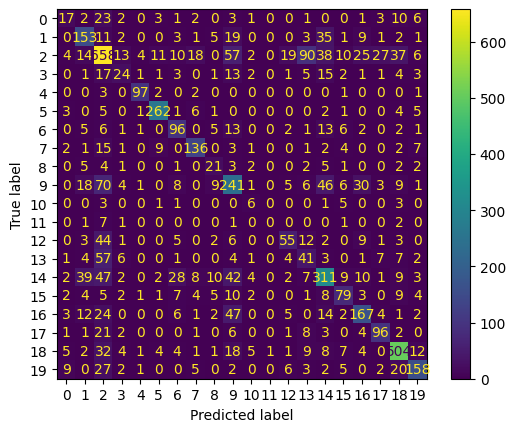

In [53]:
y_pred = mlp.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

confusion = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [54]:
mlp = MLPClassifier(verbose = True, hidden_layer_sizes=(128, 64), batch_size = 16, \
                          max_iter=1000, solver='sgd', activation='logistic',\
                          learning_rate = 'constant', learning_rate_init = 0.01, random_state=2501)

mlp.fit(X_train, y_train)

Iteration 1, loss = 2.61330077
Iteration 2, loss = 2.36813731
Iteration 3, loss = 2.15326612
Iteration 4, loss = 2.02662270
Iteration 5, loss = 1.95544691
Iteration 6, loss = 1.88489287
Iteration 7, loss = 1.82776812
Iteration 8, loss = 1.78562310
Iteration 9, loss = 1.75356142
Iteration 10, loss = 1.73191268
Iteration 11, loss = 1.71366279
Iteration 12, loss = 1.69954471
Iteration 13, loss = 1.68544703
Iteration 14, loss = 1.66993119
Iteration 15, loss = 1.65906374
Iteration 16, loss = 1.64913501
Iteration 17, loss = 1.63537034
Iteration 18, loss = 1.62883037
Iteration 19, loss = 1.61831840
Iteration 20, loss = 1.60986140
Iteration 21, loss = 1.60037893
Iteration 22, loss = 1.59320568
Iteration 23, loss = 1.58732351
Iteration 24, loss = 1.58168810
Iteration 25, loss = 1.57428440
Iteration 26, loss = 1.56762839
Iteration 27, loss = 1.56063538
Iteration 28, loss = 1.55504448
Iteration 29, loss = 1.54780599
Iteration 30, loss = 1.54130724
Iteration 31, loss = 1.53466549
Iteration 32, los

,hidden_layer_sizes,"(128, ...)"
,activation,'logistic'
,solver,'sgd'
,alpha,0.0001
,batch_size,16
,learning_rate,'constant'
,learning_rate_init,0.01
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,2501


In [55]:
mlp.score(X_train, y_train)

0.7964136780650543

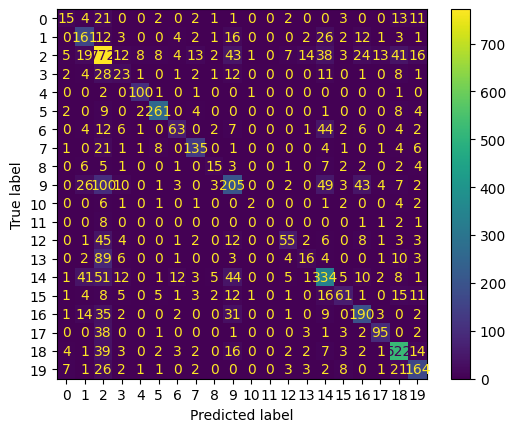

In [56]:
y_pred = mlp.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

confusion = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)